In [1]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [2]:
ls

MyDrive/  Shareddrives/


In [3]:
cd/gdrive/MyDrive/Vehicle Classification/

/gdrive/MyDrive/Vehicle Classification


In [4]:
ls

Bikes/  Cars/


In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.preprocessing.image import load_img

In [6]:
import os
import PIL
import pathlib
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import preprocessing
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils

In [7]:
BATCH_SIZE = 62
IMAGE_SIZE = 256
EPOCHS=30
CHANNELS=3

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "/gdrive/MyDrive/Vehicle Classification",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 789 files belonging to 2 classes.


In [9]:
class_names = dataset.class_names
class_names

['Bikes', 'Cars']

In [10]:
len(dataset)

13

In [11]:
for image_batch, label_batch in dataset.take(1):
  print(image_batch.shape)
  print(image_batch[1])
  print(label_batch.numpy())

(62, 256, 256, 3)
tf.Tensor(
[[[206.83594  194.84961  156.95898 ]
  [193.97461  183.09766  153.87695 ]
  [168.35938  160.4961   150.24805 ]
  ...
  [128.19727  137.40234  120.197266]
  [173.19531  181.23633  168.07227 ]
  [184.86328  191.87695  183.8086  ]]

 [[206.96411  194.99487  157.1128  ]
  [203.7085   194.03027  165.40894 ]
  [186.27075  178.40747  168.15942 ]
  ...
  [135.18457  144.38965  127.18457 ]
  [165.11182  173.15283  159.98877 ]
  [174.26392  181.27759  173.20923 ]]

 [[202.5564   191.33716  154.19995 ]
  [206.37378  197.4148   169.15308 ]
  [198.56885  190.75684  180.53442 ]
  ...
  [149.04053  157.46997  140.6399  ]
  [160.677    167.96802  155.17896 ]
  [164.20557  170.83911  162.03613 ]]

 ...

 [[ 80.        84.        87.      ]
  [ 80.        84.        87.      ]
  [ 80.        84.        87.      ]
  ...
  [ 93.93164   91.93164   92.93164 ]
  [ 94.958984  92.958984  93.958984]
  [ 95.        93.        94.      ]]

 [[ 80.        84.        87.      ]
  [ 80. 

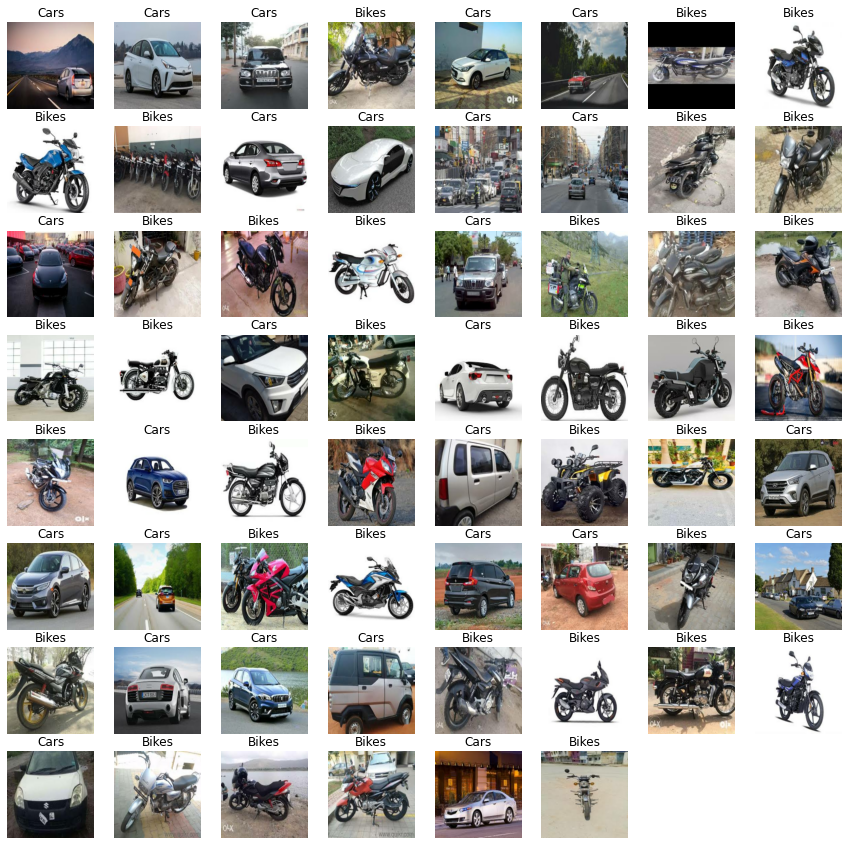

In [12]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in dataset.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(8, 8, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [13]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    # Autotune all the 3 datasets 
    train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
    return train_ds, val_ds, test_ds

In [14]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [15]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [16]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [17]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 9

model = models.Sequential([
    resize_and_rescale,
    # data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])
model.build(input_shape=input_shape)

In [18]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [19]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (62, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (62, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (62, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (62, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (62, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (62, 60, 60, 64)         

In [20]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/30
10/10 [==============================] - 83s 6s/step - loss: 1.2491 - accuracy: 0.4610 - val_loss: 0.8325 - val_accuracy: 0.4839
Epoch 2/30
10/10 [==============================] - 60s 6s/step - loss: 0.6522 - accuracy: 0.6235 - val_loss: 0.5505 - val_accuracy: 0.7742
Epoch 3/30
10/10 [==============================] - 62s 6s/step - loss: 0.5507 - accuracy: 0.7164 - val_loss: 0.4995 - val_accuracy: 0.7581
Epoch 4/30
10/10 [==============================] - 61s 6s/step - loss: 0.5383 - accuracy: 0.7197 - val_loss: 0.4867 - val_accuracy: 0.7419
Epoch 5/30
10/10 [==============================] - 61s 6s/step - loss: 0.4792 - accuracy: 0.7711 - val_loss: 0.4254 - val_accuracy: 0.8065
Epoch 6/30
10/10 [==============================] - 61s 6s/step - loss: 0.4440 - accuracy: 0.7910 - val_loss: 0.4282 - val_accuracy: 0.8548
Epoch 7/30
10/10 [==============================] - 61s 6s/step - loss: 0.4143 - accuracy: 0.8259 - val_loss: 0.3206 - val_accuracy: 0.8710
Epoch 8/30
10/10 [==

In [21]:
model.evaluate(test_ds)

2/2 [==============================] - 6s 2s/step - loss: 0.0584 - accuracy: 0.9919


[0.05840922147035599, 0.9919354915618896]

In [22]:
acc = history.history['accuracy']
loss = history.history['loss']

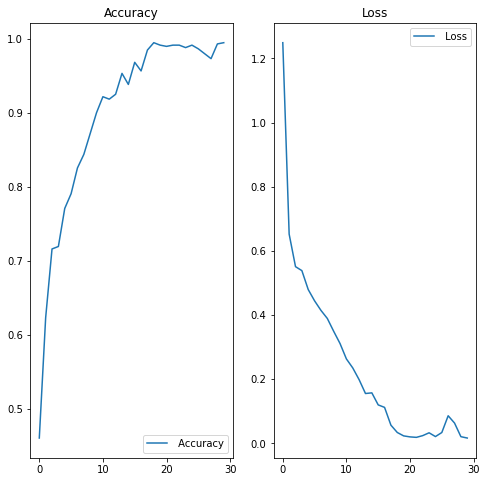

In [23]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label=' Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label=' Loss')
plt.legend(loc='upper right')
plt.title('Loss')
plt.show()

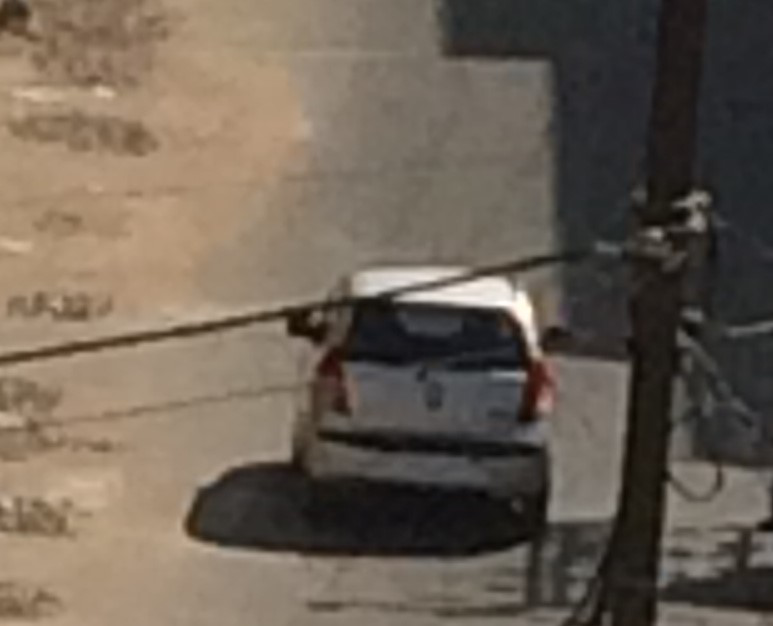

In [24]:
image_path = "/gdrive/My Drive/IMG_0171.jpg"
image = preprocessing.image.load_img(image_path)
image_array = preprocessing.image.img_to_array(image)
scaled_img = np.expand_dims(image_array, axis=0)
image

In [25]:
pred = model.predict(scaled_img)

In [26]:
output = class_names[np.argmax(pred)]

In [27]:
output

'Cars'

In [28]:
model.save("Vehicle Classification.h5")